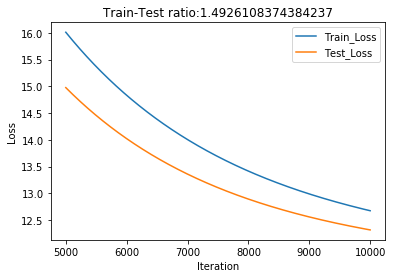

In [1]:
# write your code here
# -*- coding: utf-8 -*-
"""
"""
from numpy import *;
import numpy as np
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

X, y = get_data()
X=X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
y_train=mat(y_train).T
y_test=mat(y_test).T

X_train=mat(np.c_[np.ones(len(X_train)),X_train])
X_test=mat(np.c_[np.ones(len(X_test)),X_test])

w=mat(random.random((X_train.shape[1],1)))

x=[]
y1=[]
y2=[]
for i in range(0,10000):"""Iteration"""
    der=-X_train.T*y_train+X_train.T*X_train*w
    der_avarage=der/X_train.shape[0]
    yTrain=(1/2*(y_train-X_train*w).T*(y_train-X_train*w))/len(X_train)
    yTest=(1/2*(y_test-X_test*w).T*(y_test-X_test*w))/len(X_test)
    w=w-0.001*der_avarage
    if i>5000:
        x.append(i)
        y1.append(yTrain[0,0])
        y2.append(yTest[0,0])

plt.plot(x,y1, label='Train_Loss')
plt.plot(x,y2, label='Test_Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train-Test ratio:'+str(len(X_train)/len(X_test)))
plt.legend()
plt.show()

temp=mat((X_train.T*X_train).data).reshape(-1,X_train.shape[1])
w=(temp.I*X_train.T)*y_train